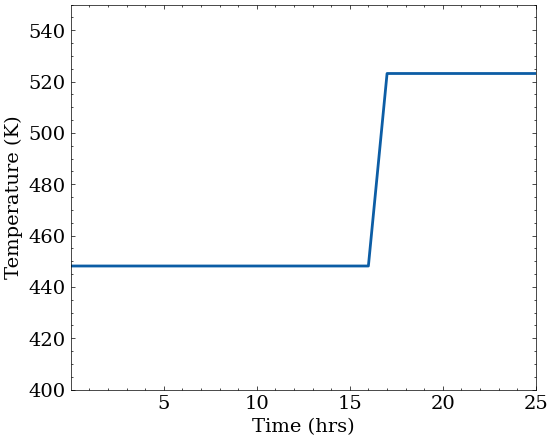

In [1]:
from kawin.Thermodynamics import MulticomponentThermodynamics
from kawin.KWNEuler import PrecipitateModel
import matplotlib.pyplot as plt

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 14})

phases = ['FCC_A1', 'MGSI_B_P', 'MG5SI6_B_DP', 'B_PRIME_L', 'U1_PHASE', 'U2_PHASE']
therm = MulticomponentThermodynamics('AlMgSi.tdb', ['AL', 'MG', 'SI'], phases, 
    drivingForceMethod='approximate')

model = PrecipitateModel(0, 25*3600, 1e4, phases=phases[1:], elements=['MG', 'SI'], 
    linearTimeSpacing=True)

model.setInitialComposition([0.0072, 0.0057])
model.setVmAlpha(1e-5, 4)

gamma = {
    'MGSI_B_P': 0.18,
    'MG5SI6_B_DP': 0.084,
    'B_PRIME_L': 0.18,
    'U1_PHASE': 0.18,
    'U2_PHASE': 0.18
        }

for i in range(len(phases)-1):
    model.setInterfacialEnergy(gamma[phases[i+1]], phase=phases[i+1])
    model.setVmBeta(1e-5, 4, phase=phases[i+1])
    model.setThermodynamics(therm, phase=phases[i+1], removeCache=False)
    
lowTemp = 175+273.15
highTemp = 250+273.15
model.setTemperatureArray([0, 16, 17], [lowTemp, lowTemp, highTemp])

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
model.plot(ax, 'Temperature', linewidth=2, timeUnits='h')
ax.set_ylim([400, 550])
ax.set_xscale('linear')
plt.show()

In [2]:
model.solve(verbose=True, vIt=5000)
model.save('AlMgSi')

Nucleation density not set.
Setting nucleation density assuming grain size of 100 um and dislocation density of 5e+12 #/m2


c:\Users\nury\AppData\Local\Programs\Python\Python310\lib\site-packages\pycalphad\core\utils.py:54: RuntimeWarning: invalid value encountered in divide
  pts[:, cur_idx:end_idx] /= pts[:, cur_idx:end_idx].sum(axis=1)[:, None]


N	Time (s)	Temperature (K)	MG	SI	
5000	4.5e+04		448		0.3118	0.1024	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	MGSI_B_P	2.050e+22		0.0595		1.7575e-09	8.6466e+03
	MG5SI6_B_DP	1.279e+24		0.8200		1.0870e-09	1.5759e+03
	B_PRIME_L	1.172e+16		0.0000		1.5682e-09	4.1972e+03
	U1_PHASE	3.080e+08		0.0000		3.8188e-10	4.3610e+03
	U2_PHASE	1.222e+09		0.0000		4.7452e-10	4.0113e+03

N	Time (s)	Temperature (K)	MG	SI	
10000	8.6e+04		523		0.0571	0.2035	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	MGSI_B_P	5.299e+21		1.0321		7.3370e-09	4.9014e+02
	MG5SI6_B_DP	0.000e+00		0.0000		0.0000e+00	-4.7837e+03
	B_PRIME_L	0.000e+00		0.0000		0.0000e+00	-2.5215e+03
	U1_PHASE	0.000e+00		0.0000		0.0000e+00	1.1839e+03
	U2_PHASE	0.000e+00		0.0000		0.0000e+00	-8.9218e+02

Finished in 464.034 seconds.


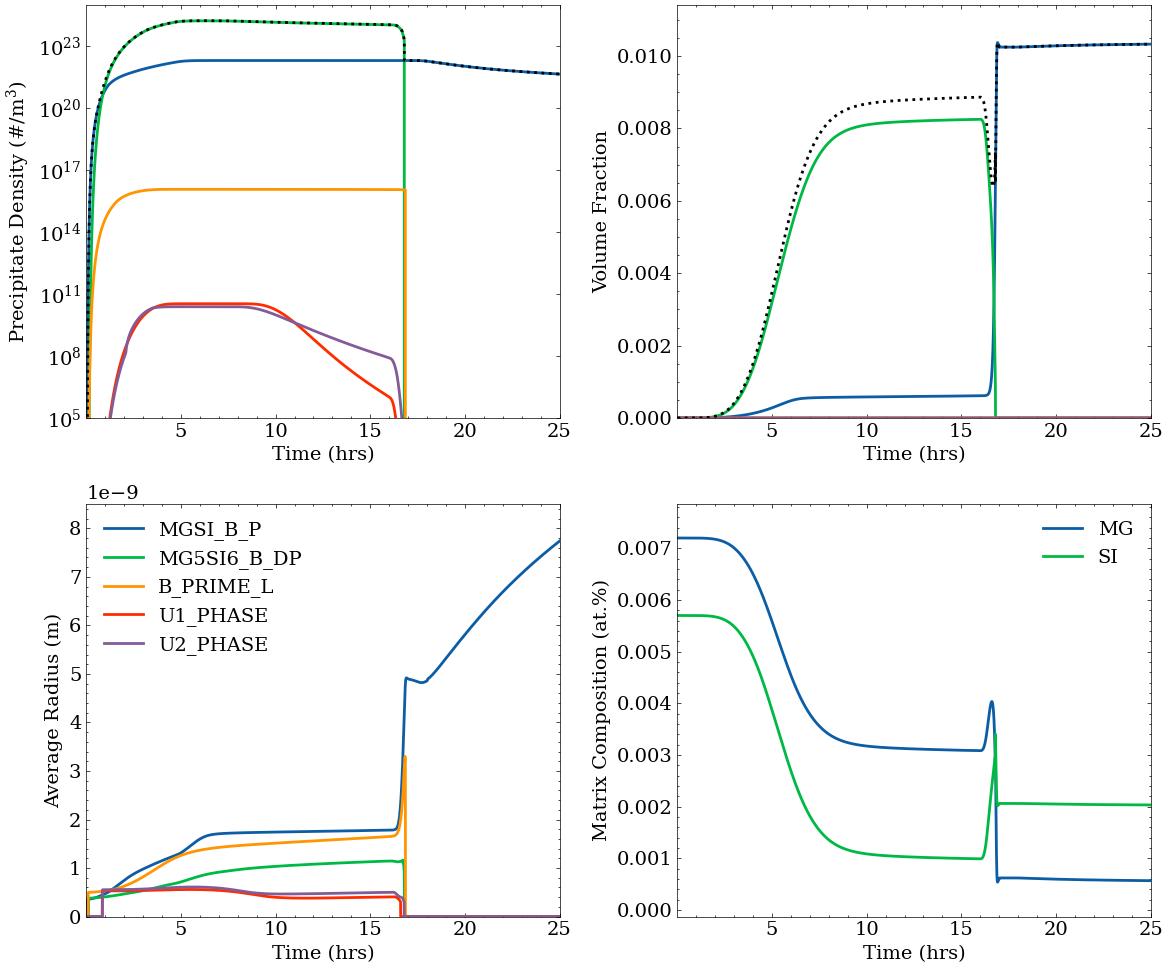

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

model = PrecipitateModel.load('AlMgSi.npz')

model.plot(axes[0,0], 'Total Precipitate Density', linewidth=2, timeUnits='h', label='Total', color='k', linestyle=':', zorder=6)
model.plot(axes[0,0], 'Precipitate Density', linewidth=2, timeUnits='h')
axes[0,0].set_ylim([1e5, 1e25])
axes[0,0].set_xscale('linear')
axes[0,0].set_yscale('log')
axes[0,0].get_legend().remove()

model.plot(axes[0,1], 'Total Volume Fraction', linewidth=2, timeUnits='h', label='Total', color='k', linestyle=':', zorder=6)
model.plot(axes[0,1], 'Volume Fraction', linewidth=2, timeUnits='h')
axes[0,1].set_xscale('linear')
axes[0,1].get_legend().remove()

model.plot(axes[1,0], 'Average Radius', linewidth=2, timeUnits='h')
axes[1,0].set_xscale('linear')

model.plot(axes[1,1], 'Composition', linewidth=2, timeUnits='h')
axes[1,1].set_xscale('linear')
plt.tight_layout()
plt.show()